# Working with Categorical Data in Python

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

What does it mean to be "categorical"?
- Finite number of groups (or categories)
- These categories are ususally fixed or known (eye color, hair color)
- Known as qualitative data

Categorical data can be broke down into two main types:
- **ordinal** (having a natural rank order - Strongly Disagree / Disagree / Neutral / Agree / Strongly Agree)
- **nominal** (cannot be placed into a natural order - Blue / Green / Blue / Red)

Notice that if we have groups of people with different income like `$0 < $10 000`, `$10 000 < $20 000`, `$20 000 < $30 000` this will be an example of **ordinal categorical data**

In [33]:
adults = pd.read_csv("databases/adult.csv")
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Exploring "Marital Status" column

In [34]:
adults["Marital Status"].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

In [35]:
adults["Marital Status"].value_counts()

Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [36]:
adults["Marital Status"].value_counts(normalize=True)

Marital Status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

## Categorical data in pandas

In [37]:
adults.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object

In [38]:
adults["Marital Status"].dtype

dtype('O')

pandas uses the capital O to represent the object dtype

To convert it into categorical dtype:

In [39]:
adults["Marital Status"] = adults["Marital Status"].astype("category")
adults["Marital Status"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)

**Creating a categorical Series**

In [40]:
my_data = ["A", "A", "C", "B", "C", "A"]

my_series1 = pd.Series(my_data, dtype="category")
print(my_series1)

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C']


Another way which allows us to set order

In [41]:
my_data = ["A", "A", "C", "B", "C", "A"]
my_series2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True)
my_series2

['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']

**Why do we use categorical: memory**

In [42]:
adults["Marital Status"] = adults["Marital Status"].astype("object")
print(f"Object: {adults["Marital Status"].nbytes}")
adults["Marital Status"] = adults["Marital Status"].astype("category")
print(f"Category: {adults["Marital Status"].nbytes}")

Object: 260488
Category: 32617


**Specify dtypes when reading data**

In [43]:
adults_dtypes = {"Marital Status": "category"}

adults = pd.read_csv("databases/adult.csv", dtype=adults_dtypes)

adults["Marital Status"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)

In [44]:
adults.dtypes

Age                   int64
Workclass            object
fnlgwt                int64
Education            object
Education Num         int64
Marital Status     category
Occupation           object
Relationship         object
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k      object
dtype: object

### Grouping data by category in pandas

In [45]:
import pandas as pd
groupby_object = adults.groupby(by=["Above/Below 50k"], observed=False)
groupby_object.mean(numeric_only=True)

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [46]:
adults.groupby(by=["Above/Below 50k"], observed=False)[["Age", "Education Num"]].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [47]:
adults.groupby(by=["Above/Below 50k", "Marital Status"], observed=False).size()

Above/Below 50k  Marital Status       
<=50K            Divorced                  3980
                 Married-AF-spouse           13
                 Married-civ-spouse        8284
                 Married-spouse-absent      384
                 Never-married            10192
                 Separated                  959
                 Widowed                    908
>50K             Divorced                   463
                 Married-AF-spouse           10
                 Married-civ-spouse        6692
                 Married-spouse-absent       34
                 Never-married              491
                 Separated                   66
                 Widowed                     85
dtype: int64

## Setting category variables

In [48]:
dogs = pd.read_csv("databases/ShelterDogs.csv")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [49]:
dogs["coat"] = dogs["coat"].astype("category")
dogs["coat"].value_counts(dropna=False)

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

**The `.cat` accessor object**

`Series.cat.method_name`

Common parameters:
- `new_categories`: a list of categories
- `inplace`: Boolean - whether or not the update should overwrite the Series
- `ordered`: Boolean - whether or not categorical is treated as an ordered caregorical

Using `new_categories`

In [50]:
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories = ["short", "medium", "long"]
)
#values not listed in a new_categories list will be dropped

In [51]:
dogs["coat"].value_counts(dropna=False)

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64

In [52]:
dogs["coat"] = dogs["coat"].cat.set_categories(
    new_categories = ["short", "medium", "long"],
    ordered=True
)
dogs["coat"].head(3)

0    short
1    short
2    short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

**Adding categories** 

In [53]:
dogs["likes_people"].value_counts(dropna=False)

likes_people
yes    1991
NaN     938
no        8
Name: count, dtype: int64

In [54]:
#Do not run cause the given df already has these categories
dogs["likes_people"] = dogs["likes_people"].astype("category")
dogs["likes_people"] = dogs["likes_people"].cat.add_categories(
    new_categories=["did not check", "could not tell"]
)

In [55]:
#To see existing categories
dogs["likes_people"].cat.categories

Index(['no', 'yes', 'did not check', 'could not tell'], dtype='object')

In [56]:
dogs["likes_people"].value_counts(dropna=False)

likes_people
yes               1991
NaN                938
no                   8
did not check        0
could not tell       0
Name: count, dtype: int64

**Removing categories**

In [ ]:
# Again do not run
dogs["coat"] = dogs["coat"].astype("category")
dogs["coat"] = dogs["coat"].cat.remove_categories(
    removals=["wirehaired"]
)

In [58]:
dogs["coat"].cat.categories

Index(['short', 'medium', 'long'], dtype='object')

**Methods recap:**
- `cat.set_categories()`
- `cat.add_categories()`
- `cat.remove_categories()`

## Updating Categories

In [60]:
dogs["breed"] = dogs["breed"].astype("category")
dogs["breed"].value_counts()

breed
Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

We want to rename Unknown mix to be Unknown

**Renaming categories**

`Series.cat.rename_categories(new_categories=dict)`

In [61]:
my_changes = {"Unknown Mix": "Unknown"}

dogs["breed"] = dogs["breed"].cat.rename_categories(my_changes)
dogs["breed"].value_counts()

breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

**Renaming categories with a function**

In [62]:
dogs["sex"] = dogs["sex"].astype("category")
dogs["sex"] = dogs["sex"].cat.rename_categories(lambda c: c.title())

dogs["sex"].cat.categories

Index(['Female', 'Male'], dtype='object')

Collapsing categories

We need this to give multiple categories the same name and collapse them together. Notice that here we do not use `.cat` in any way, we simply work with strings and then convert an object into a `category`

In [63]:
# Create the update_coats dictionary
update_coats = {"wirehaired": "medium",
                "medium-long": "medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

coat_collapsed
short     1972
medium     565
long       180
Name: count, dtype: int64


## Reordering categories

In [ ]:
dogs["coat"] = dogs["coat"].astype("category")

dogs["coat"] = dogs["coat"].cat.reorder_categories(
    new_categories = ["short", "medium", "wirehaired", "long"],
    ordered=True
)

The order below will be the same as we have specified it to be

In [65]:
dogs.groupby(by=["coat"], observed=False)["age"].mean()

coat
short     8.364746
medium    9.027982
long      9.552056
Name: age, dtype: float64

Grouping when ordered is False means we do not want the column to be ordinal, but it will have the order we have specified it to be

In [ ]:
dogs["coat"] = dogs["coat"].cat.reorder_categories(
    new_categories = ["short", "medium", "long", "wirehaired"],
    ordered=False
)

dogs.groupby(by=["coat"], observed=False)["age"].mean()

Example from tasks 

In [67]:
dogs["size"] = dogs["size"].astype("category")

dogs["size"] = dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
)

# How many Male/Female dogs are available of each size?
print(dogs.groupby("size", observed=False)["sex"].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby("size", observed=False)["keep_in"].value_counts())

size    sex   
small   Male       260
        Female     214
medium  Male      1090
        Female     854
large   Male       331
        Female     188
Name: count, dtype: int64
size    keep_in             
small   both flat and garden    238
        flat                     80
        garden                   21
medium  both flat and garden    795
        garden                  317
        flat                     97
large   both flat and garden    191
        garden                  172
        flat                      5
Name: count, dtype: int64


## Cleaning and accessing data

**Identifying issues:**
- `Series.cat.categories()`
- `Series.value_counts()`

In [68]:
dogs["get_along_cats"].value_counts()

get_along_cats
yes    275
no     156
Name: count, dtype: int64

Imagine that we get:
- No 2503
- yes 156
- no 156
- Noo 2
-   NO 1

Fixing issues with whitespace

In [69]:
dogs["get_along_cats"] = dogs["get_along_cats"].str.strip()

Fixing issues with capitalization (`title()`, `upper()`, `lower()`)

In [70]:
dogs["get_along_cats"] = dogs["get_along_cats"].str.title()

Fixing issues: misspelled words

In [ ]:
replace_map = {"Noo": "No"}
dogs["get_along_cats"].replace(replace_map, inplace=True)

Remember to convert the Series back to category

**Searching for a string**

In [72]:
dogs["breed"].str.contains("Shepherd", regex=False)

0       False
1       False
2       False
3       False
4       False
        ...  
2932    False
2933    False
2934    False
2935    False
2936     True
Name: breed, Length: 2937, dtype: bool

**Accessing data with loc**

In [73]:
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,coat_collapsed
0,23807,Gida,0.25,Female,Unknown,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
1,533,Frida És Ricsi,0.17,Female,Unknown,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,Yes,NaN,short
2,23793,NaN,4.00,Male,Unknown,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
3,23795,NaN,1.00,Male,Unknown,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
4,23806,Amy,2.00,Female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short


In [74]:
dogs.loc[dogs["get_along_cats"] == "Yes", "size"]

1        small
6        small
9        small
13       small
16       small
         ...  
2722    medium
2746    medium
2763    medium
2809     large
2815    medium
Name: size, Length: 275, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

Exercise example

In [75]:
# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype("category")

print(dogs["sex"].value_counts())

sex
male      1681
female    1256
Name: count, dtype: int64


Second task

In [76]:
# Print the category of the coat for ID 23807
print(dogs.loc[dogs.index == 23807, "coat"])

Series([], Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long'])


In [77]:
# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs["coat"] == "long", "sex"].value_counts())

sex
male      124
female     56
Name: count, dtype: int64


In [78]:
# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs["breed"] == "English Cocker Spaniel", "age"].mean())

8.186153846153847


In [79]:
print(dogs[dogs["breed"].str.contains("English", regex=False)].shape[0])

35


## Introduction to categorical plots using Seaborn

In [81]:
reviews = pd.read_csv("databases/lasvegas_tripadvisor.csv")
reviews.shape

(504, 20)

In [82]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

We will mainly focus on `sns.catplot()` - categorical plots

Parameters:
- `x`: name of variable of data
- `y`: name of variable of data
- `data`: a DataFrame
- `kind`

### Box plots

In [83]:
reviews["Score"].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

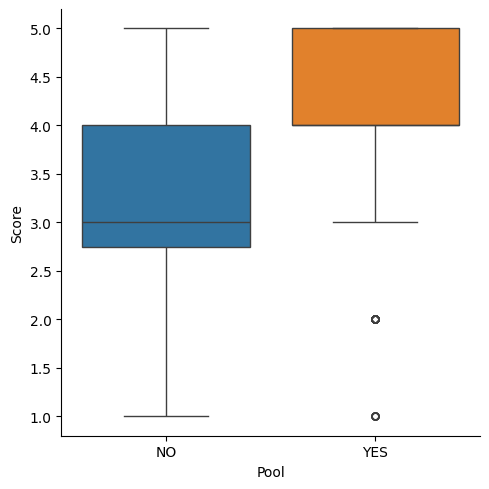

In [90]:
sns.catplot(x="Pool",
            y="Score",
            data=reviews,
            kind="box",
            hue="Pool")
plt.show()

Let's improve the plot

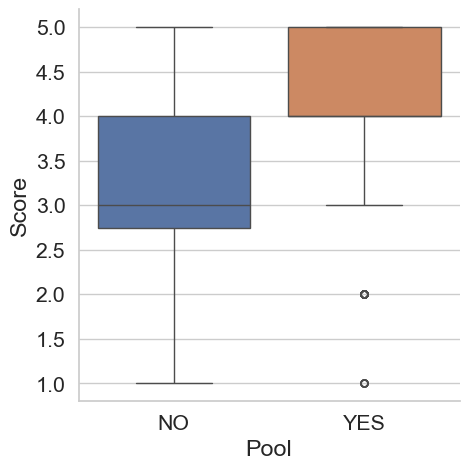

In [91]:
# Setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")


sns.catplot(x="Pool",
            y="Score",
            data=reviews,
            kind="box",
            hue="Pool")
plt.show()

### Bar plots

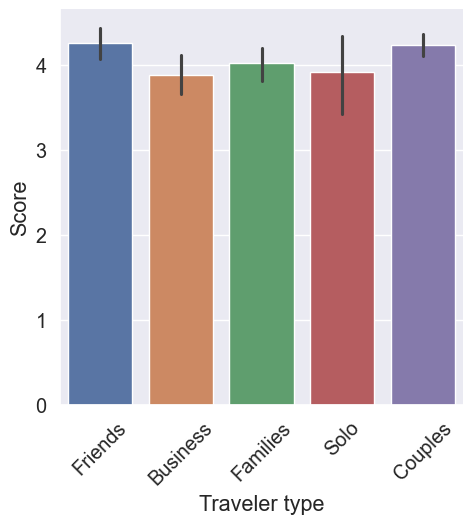

In [96]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(x="Traveler type",
            y="Score",
            data=reviews,
            kind="bar",
            hue="Traveler type")
plt.xticks(rotation=45)
plt.show()

**Ordering your categories**

In [97]:
reviews["Traveler type"] = reviews["Traveler type"].astype("category")
reviews["Traveler type"].cat.categories  #automatically alphabetically ordered

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

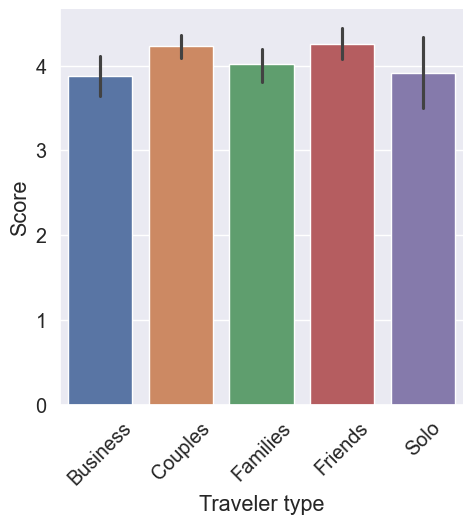

In [98]:
sns.catplot(x="Traveler type",
            y="Score",
            data=reviews,
            kind="bar",
            hue="Traveler type")
plt.xticks(rotation=45)
plt.show()

`catplot()` has an `order` parameter, however it is best practice to manage order outside of the plot

**`hue()`**

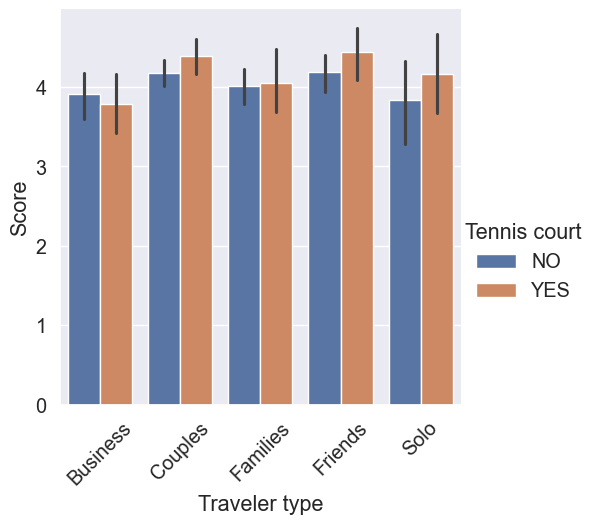

In [102]:
sns.set_style("darkgrid")
sns.catplot(x="Traveler type",
            y="Score",
            data=reviews,
            kind="bar",
            hue="Tennis court")
plt.xticks(rotation=45)
plt.show()

**From exercises about reordering**

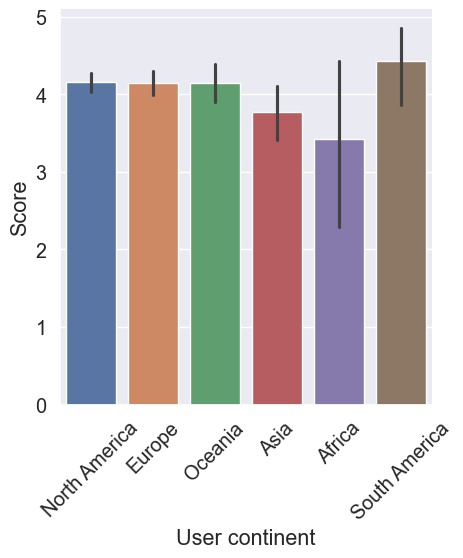

In [106]:
# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")

# Here we sort regions by popularity (most visitors from here)
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories = continent_categories)

sns.catplot(x="User continent",
            y="Score",
            data=reviews,
            kind="bar", 
            hue="User continent")
plt.xticks(rotation=45)
plt.show()

**Point and count plots**

Point plot helps to feel the difference between categories with a help of a connecting line (especially if there is more than two possible (outcomes) categorical variables)

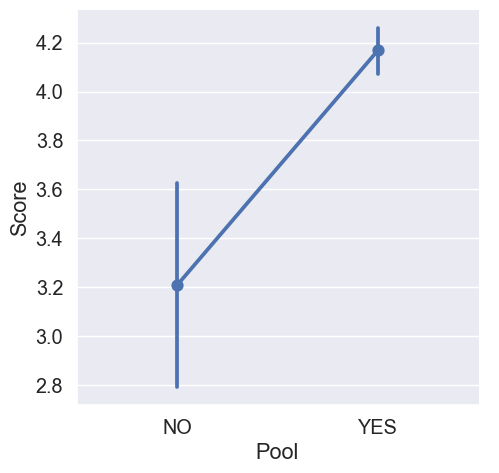

In [107]:
sns.catplot(x="Pool",
            y="Score",
            data=reviews,
            kind="point")
plt.show()

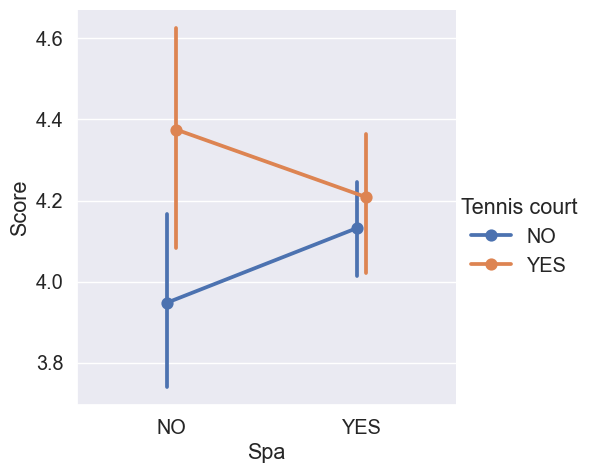

In [111]:
sns.catplot(x="Spa",
            y="Score",
            data=reviews,
            kind="point",
            hue="Tennis court",
            dodge=True) #to avoid overlapping
plt.show()

Tennis courts make a big deal for hotels with no Spa

To dismiss joining dots with a line - `linestyle='none'`

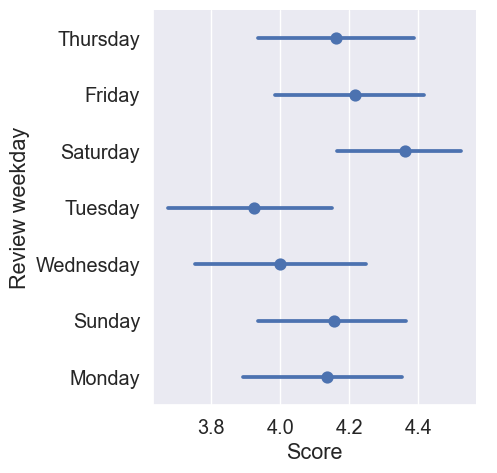

In [125]:
sns.catplot(x="Score",
            y="Review weekday",
            data=reviews,
            kind="point",
            linestyle='none') #to avoid overlapping
plt.show()

**count** (basically a barplot, which has number of occurence on the y-axis instead of a numerical variable)

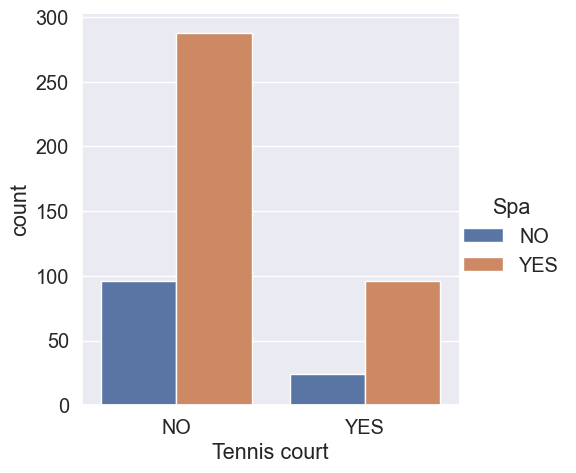

In [127]:
sns.catplot(x="Tennis court", data=reviews, kind="count", hue="Spa")

### Additional catplots options

Difficulties with showing multiple plots

C:\Users\Маша\AppData\Local\Temp\ipykernel_9820\580216195.py:1: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.catplot(x="Traveler type",


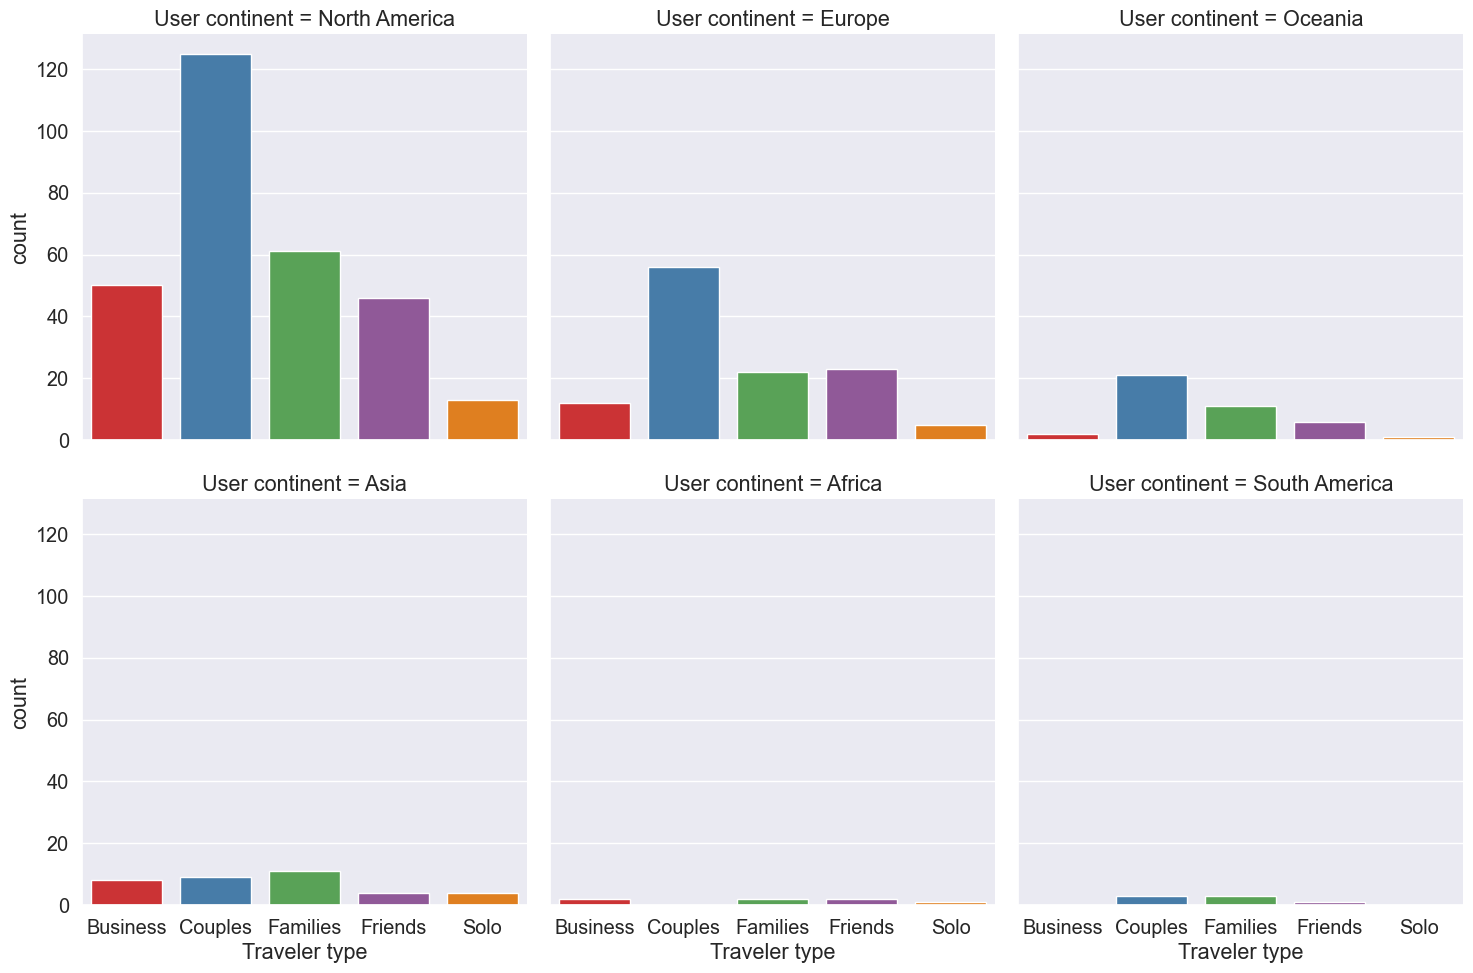

In [134]:
sns.catplot(x="Traveler type",
            kind="count",
            col="User continent",
            col_wrap=3,
            data=reviews,
            hue = "Traveler type",
            palette = sns.color_palette("Set1"))

plt.show()

Updating plots

C:\Users\Маша\AppData\Local\Temp\ipykernel_9820\1880904458.py:1: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  ax = sns.catplot(x="Traveler type",


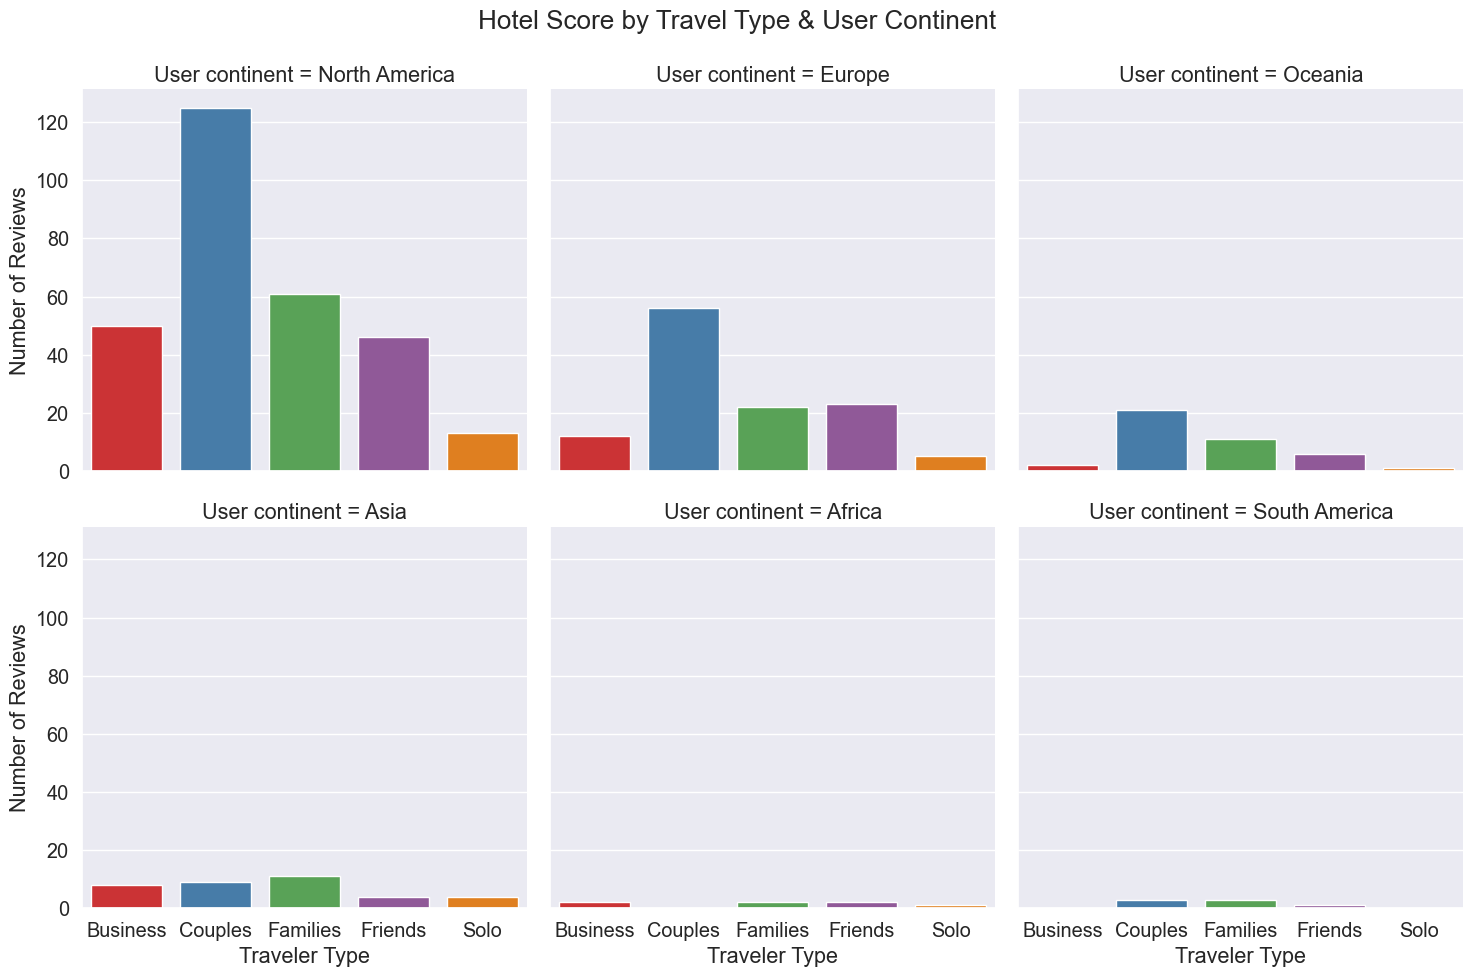

In [136]:
ax = sns.catplot(x="Traveler type",
            kind="count",
            col="User continent",
            col_wrap=3,
            data=reviews,
            hue = "Traveler type",
            palette = sns.color_palette("Set1"))

ax.fig.suptitle("Hotel Score by Travel Type & User Continent")
ax.set_axis_labels("Traveler Type", "Number of Reviews")
plt.subplots_adjust(top=.9)

plt.show()

## Categorical pitfalls (downsides)

In [139]:
cars = pd.read_csv("databases/cars.csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

**If we have a lot of unique values in a categorical series, then we are unlikely to save much memory, however if there is only a couple of unique values, then we will save a significant amount of memory**

Huge memory savings

In [143]:
print(cars["manufacturer_name"].describe())
print()
print(f"As object: {cars["manufacturer_name"].nbytes}")
print(f"As category: {cars["manufacturer_name"].astype("category").nbytes}")

count          38531
unique            55
top       Volkswagen
freq            4243
Name: manufacturer_name, dtype: object

As object: 308248
As category: 38971


Little memory savings

In [144]:
print(cars["odometer_value"].describe())
print()
print(f"As object: {cars["odometer_value"].nbytes}")
print(f"As category: {cars["odometer_value"].astype("category").nbytes}")

count      38531.000000
mean      248864.638447
std       136072.376530
min            0.000000
25%       158000.000000
50%       250000.000000
75%       325000.000000
max      1000000.000000
Name: odometer_value, dtype: float64

As object: 308248
As category: 125566


Using categories can be frustrating

- using the `.str` accessor object to manipulate data converts the Series to an object
- the `apply()` method outputs a new Series as an object
- NumPy functions generally do not work with categorical Series

From exercises (don't print out, just look)

In [ ]:
# Print the frequency table of body_type and include NaN values
print(cars["body_type"].value_counts(dropna=False))

# Update NaN values
cars.loc[cars["body_type"].isna(), "body_type"] = "other"
print(cars["body_type"].value_counts(dropna=False))

Another one

In [ ]:
# Print the frequency table of Sale Rating
print(cars["Sale Rating"].value_counts())

# Find the average score
average_score = cars["Sale Rating"].astype(int).mean()     #Key idea is to convert to int!!!

# Print the average
print(average_score)

## Label encoding

In [147]:
cars["manufacturer_name"] = cars["manufacturer_name"].astype("category")

cars["manufacturer_code"] = cars["manufacturer_name"].cat.codes

Creating a code book

In [150]:
codes = cars["manufacturer_name"].cat.codes
categories = cars["manufacturer_name"]

name_map = dict(zip(codes, categories))
print(name_map)

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


Using a book to convert back

In [152]:
cars["manufacturer_code"].map(name_map) #.map is similar to .replace

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

Boolean coding

Find all body types that have "van" in them

In [ ]:
#Code from previous lesson
cars["body_type"].str.contains("van", regex=False)

In [154]:
#New one
cars["van_code"] = np.where(
    cars["body_type"].str.contains("van", regex=False), 1, 0
)
cars["van_code"].value_counts()

van_code
0    34115
1     4416
Name: count, dtype: int64

## One-hot encoding

`pd.get_dummies()`
- data: a pandas DataFrame
- columns: a list-like object of column names
- prefix: a string to add to the beginning of each category

In [155]:
cars[["odometer_value", "color"]].head()

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,red
3,10000,blue
4,280000,black


In [156]:
cars_onehot = pd.get_dummies(cars[["odometer_value", "color"]])
cars_onehot.head()

,odometer_value,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,190000,False,False,False,False,False,False,False,False,True,False,False,False
1,290000,False,True,False,False,False,False,False,False,False,False,False,False
2,402000,False,False,False,False,False,False,False,True,False,False,False,False
3,10000,False,True,False,False,False,False,False,False,False,False,False,False
4,280000,True,False,False,False,False,False,False,False,False,False,False,False


In [157]:
cars_onehot = pd.get_dummies(cars, columns=["color"], prefix="")
cars_onehot.head()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,False,False,False,False,False,False,True,False,False,False
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,False,False,False,False,False,False,False,False,False,False
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,False,False,False,False,False,True,False,False,False,False
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,False,False,False,False,False,False,False,False,False,False
